<a id="1"></a>
# <div style="padding:18px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Logistic Regression for Insurance Cross-Sell Prediction</div>

<a id="1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Importing</b> Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Statistical test 
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for Logistic Regression
from sklearn.linear_model import LogisticRegression

# for performance matrix 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

# train test 
from sklearn.model_selection import train_test_split

# Data encoding
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Load</b> dataset into Pandas

In [2]:
# Load dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D214\train.csv"
 
df_raw_data = pd.read_csv(path) 
df_raw_data.head()   

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Check Basic information</b></span>

In [3]:
df_raw_data.shape

(381109, 12)

In [4]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Check for null/missing values</b></span>

In [5]:
# Check for null 
print("Check for Nulls")
print("-"*100)
print(df_raw_data.isnull().sum())

Check for Nulls
----------------------------------------------------------------------------------------------------
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [6]:
# Check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_raw_data.isna().sum())

Check for Missing Values
----------------------------------------------------------------------------------------------------
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Result : Data set contains 381109 rows and 12 columns, No null or missing values found,  4 numeric and 5 categorical independent features, dependent feature is a categorical column (Response) </i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Check for duplicate values</b></span>

In [7]:
# Check if any rows are duplicates
df_raw_data.duplicated().value_counts()   

False    381109
dtype: int64

In [8]:
# Check if any columns are duplicates
df_raw_data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Result : No duplicate value found</i></div>

In [9]:
# Check the count for Response variable 
df_raw_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Result : Imbalanced dataset</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Description</b></span>

In [10]:
df_raw_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
df_raw_data.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Data </b> visualization

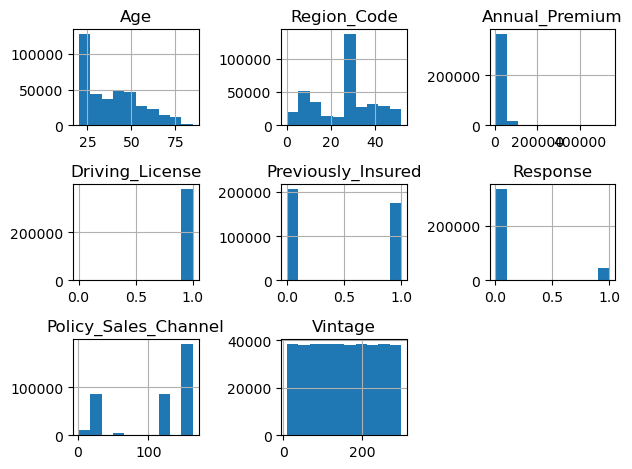

In [12]:
# Examine Distribution by histogram using Matplotlib before imputation

df_raw_data[['Age', 'Region_Code', 'Annual_Premium', 'Driving_License', 'Previously_Insured','Response',
          'Policy_Sales_Channel','Vintage']].hist()

plt.tight_layout()

# Show the plot
plt.show()

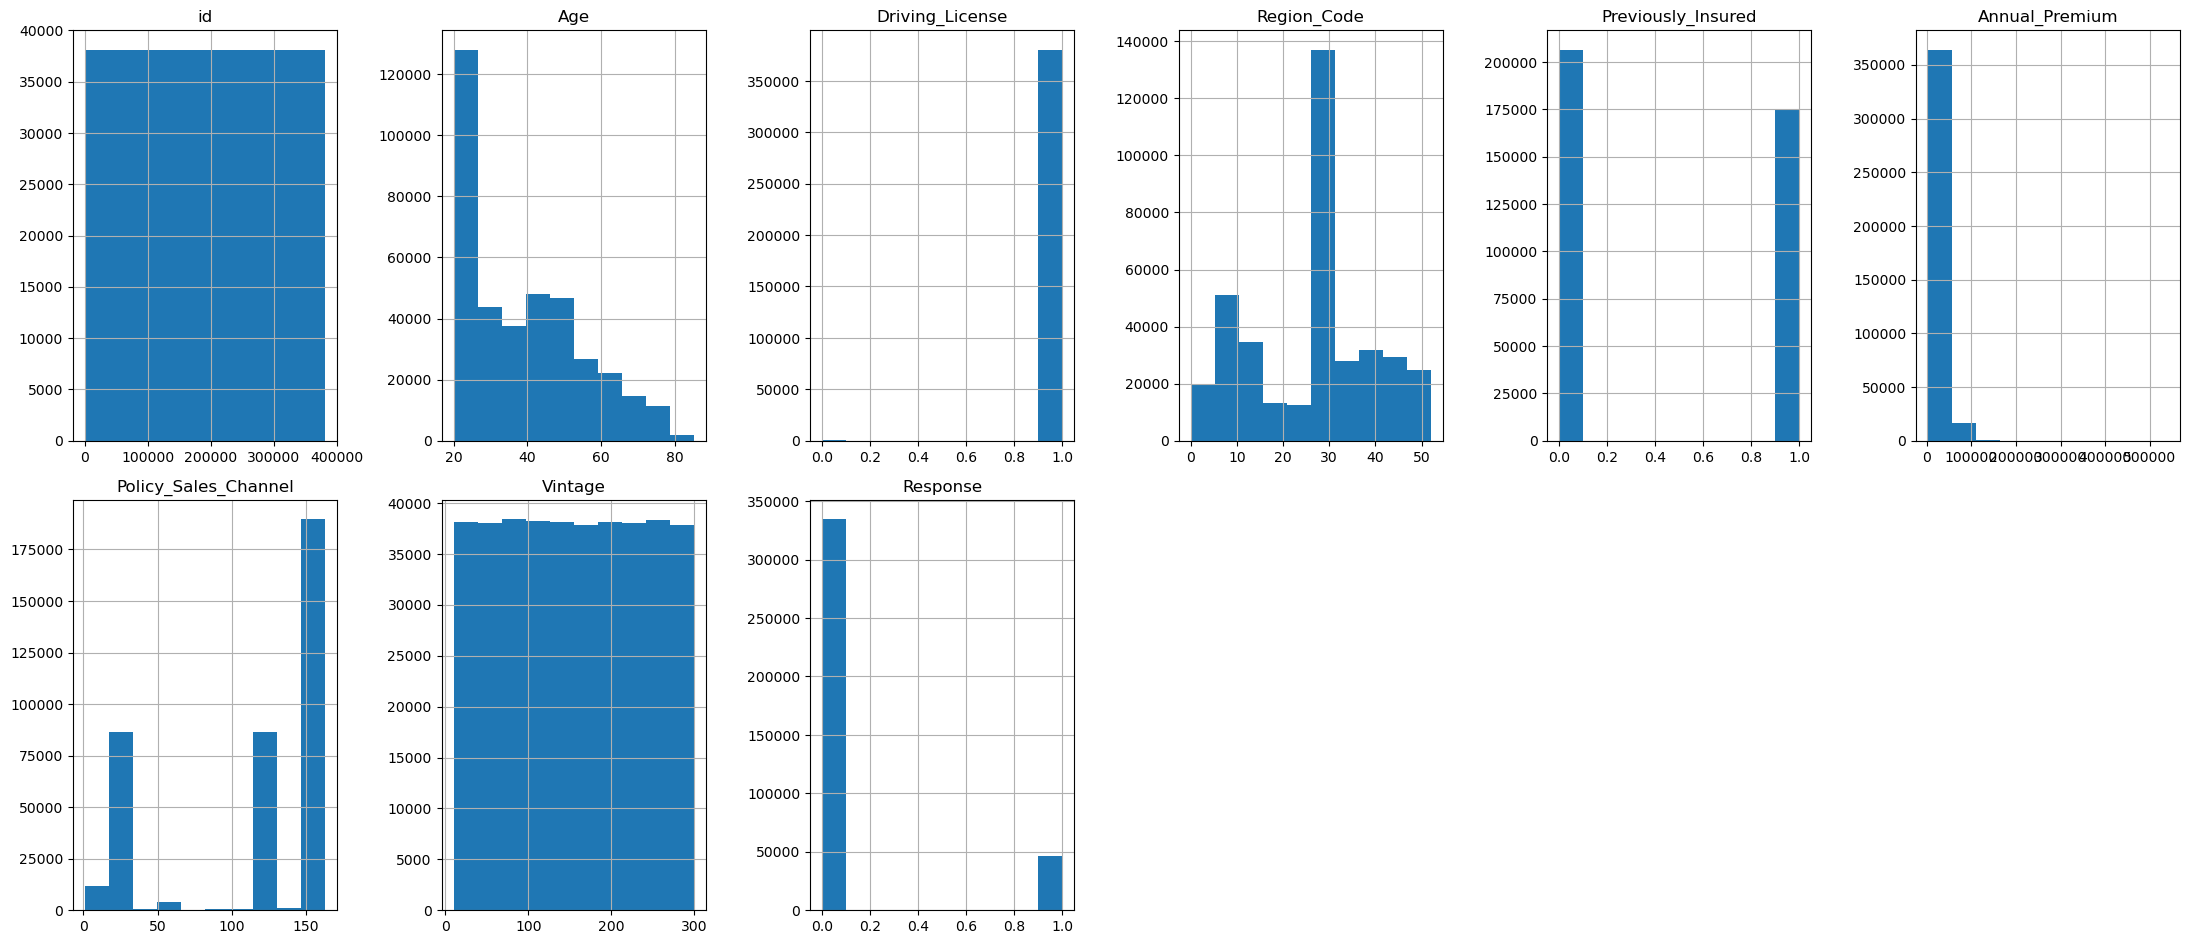

In [13]:
# Examine Distribution by histogram using Matplotlib
df_raw_data.hist(figsize=(22,14),layout=(3,6))
plt.tight_layout()

**Observations -** 

- Distribution of the Age variable is skewed towards the right side.

- Response variable, which indicates whether a policyholder is interested or not interested, has an unbalanced ratio between the labels.

- Driving_License variable also exhibits an unbalanced ratio between the labels.

- Distribution of the Annual_Premium variable is positively skewed and it contains outliers. 

- Distribution of the Vintage variable appears to be approximately uniform.


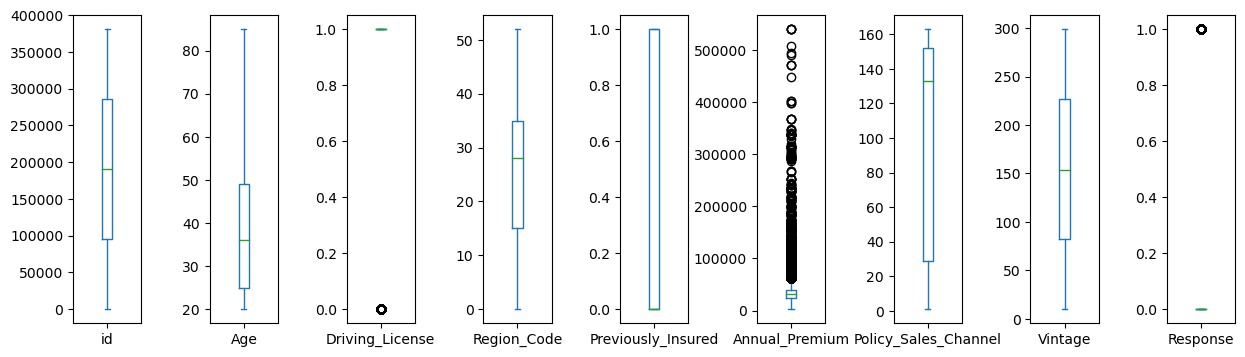

In [14]:
# create the boxplot for all the variables in the dataset using pandas' plot function 

df_raw_data.plot (
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15,4)
)

# increase spacing between subplots 
plt.subplots_adjust(wspace=1)
plt.show()

**Observation** - Outliers found for annual premimum variable

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Age vs Response</b></span>

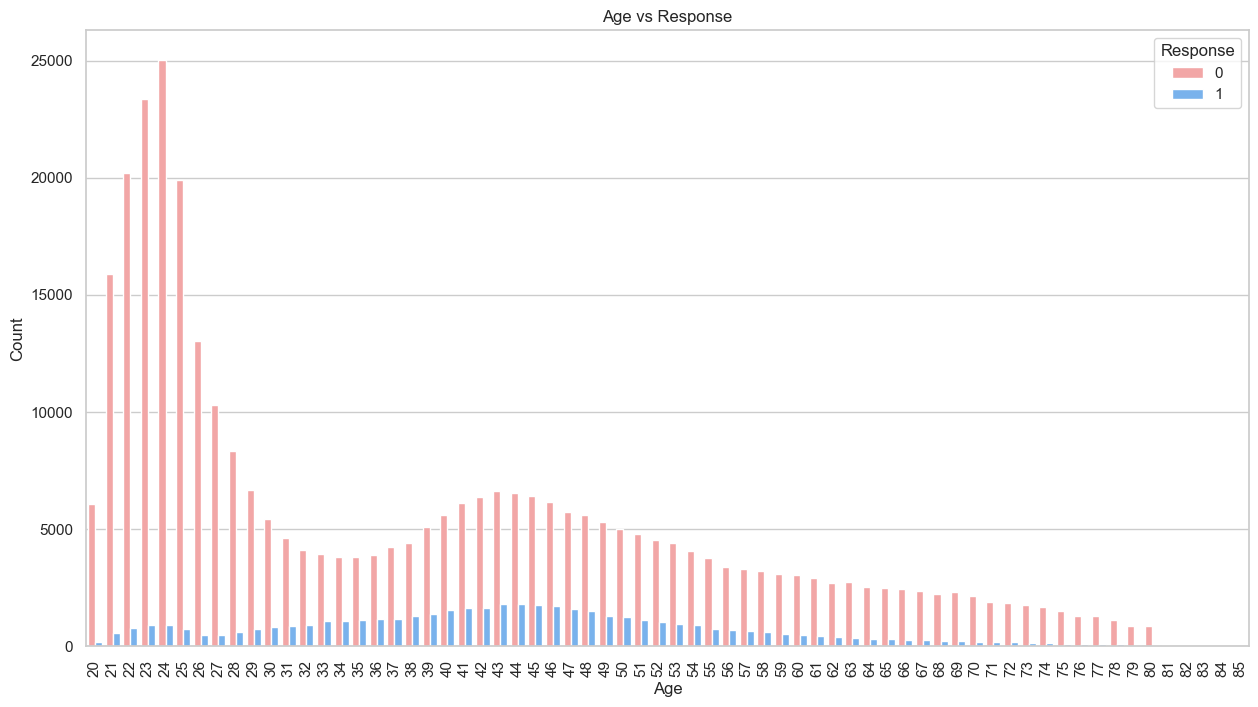

In [15]:
sns.set(style="whitegrid")

# Creating the countplot
plt.figure(figsize=(15, 8))  # Adjusting the figure size
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Age", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs Response")
plt.legend(title="Response", loc="upper right")

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Age variable is skewed towards the right side and people aged between 31 to 50 are more likely to respond positively.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Gender vs Response</b></span>

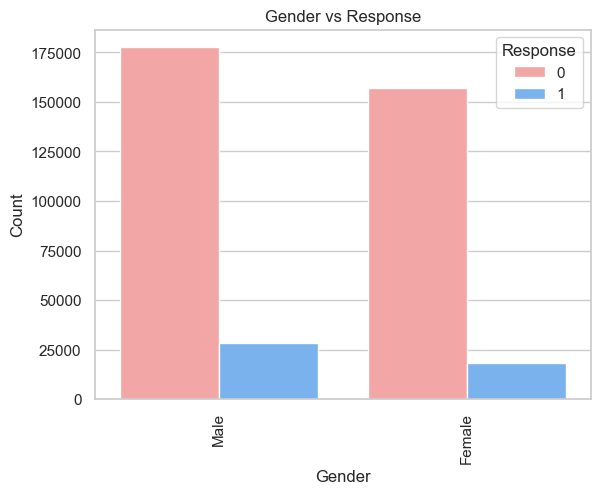

In [16]:
sns.set(style="whitegrid")

# Creating the countplot
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Gender", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Response")
plt.legend(title="Response", loc="upper right")

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> The ratio of positive (interested) and negative (not interested) responses is approximately equal for both genders.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Annual Premium vs Responsee</b></span>

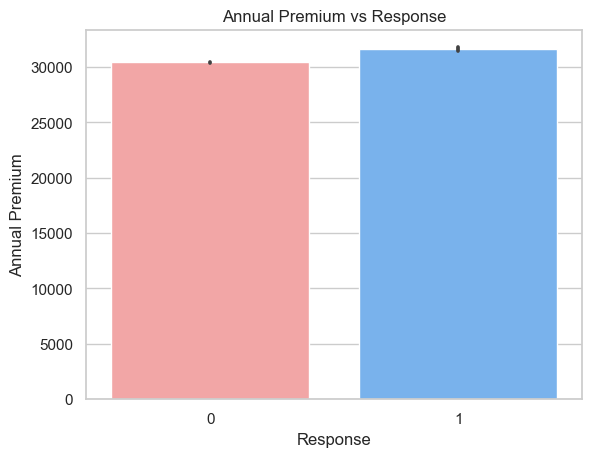

In [17]:
sns.set(style="whitegrid")

# Creating the bar plot
custom_palette = ["#FF9999", "#66B2FF"]
sns.barplot(data=df_raw_data, x="Response", y="Annual_Premium", palette=custom_palette)

# Adding labels and title
plt.xlabel("Response")
plt.ylabel("Annual Premium")
plt.title("Annual Premium vs Response")

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Majority of policyholders have lower annual premiums, while a few policyholders have higher premiums.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Driving_License vs Response </b></span>

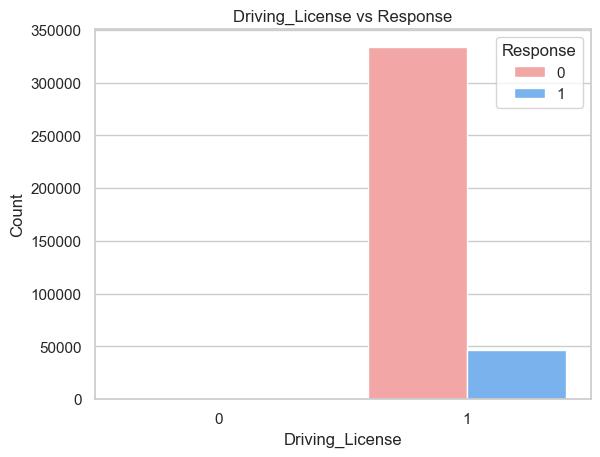

In [18]:
sns.set(style="whitegrid")

# Creating the countplot
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Driving_License", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Driving_License")
plt.ylabel("Count")
plt.title("Driving_License vs Response")
plt.legend(title="Response", loc="upper right")

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Having a driver's license does not play a significant role in the customer's response to buying vehicle insurance.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Previously_Insured vs Response</b></span>

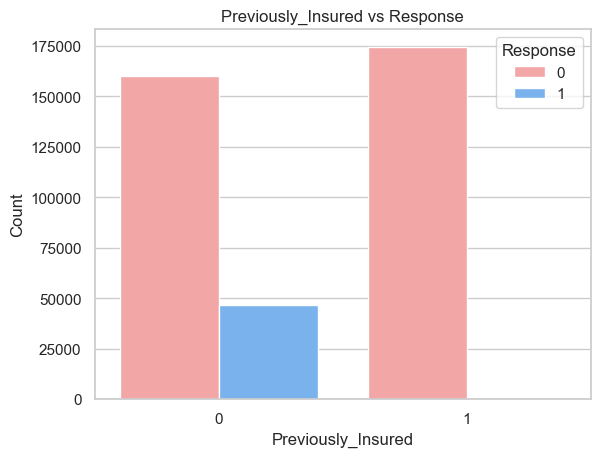

In [19]:
sns.set(style="whitegrid")

# Creating the countplot
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Previously_Insured", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Previously_Insured")
plt.ylabel("Count")
plt.title("Previously_Insured vs Response")
plt.legend(title="Response", loc="upper right")

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Customers who are not previously insured are more likely to be interested in vehicle insurance compared to those who are previously insured.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Vehicle_Age vs Response</b></span>

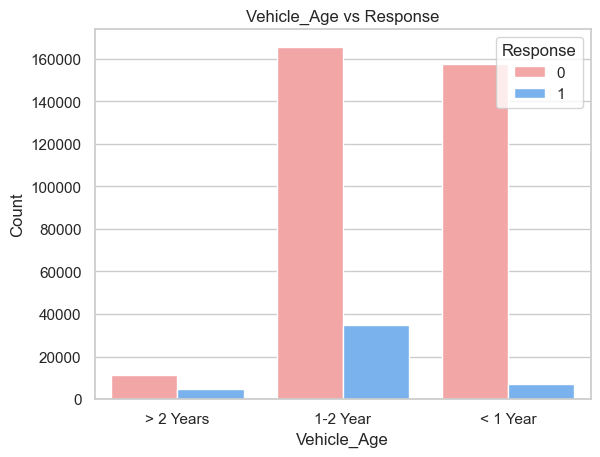

In [20]:
# Creating the countplot
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Vehicle_Age", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Vehicle_Age")
plt.ylabel("Count")
plt.title("Vehicle_Age vs Response")
plt.legend(title="Response", loc="upper right")

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Customers who have recently acquired a vehicle or have vehicles that are relatively new (1-2 years old) are more inclined to show interest in purchasing vehicle insurance.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Vehicle_Damage vs Response</b></span>

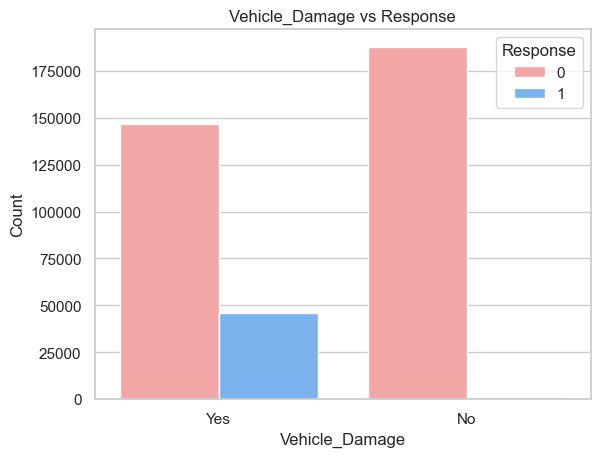

In [21]:
sns.set(style="whitegrid")

# Creating the countplot
custom_palette = ["#FF9999", "#66B2FF"]  # Custom color palette
sns.countplot(data=df_raw_data, x="Vehicle_Damage", hue="Response", palette=custom_palette)

# Adding labels and title
plt.xlabel("Vehicle_Damage")
plt.ylabel("Count")
plt.title("Vehicle_Damage vs Response")
plt.legend(title="Response", loc="upper right")

plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> The customers with vehicle damage are more likely to be interested in vehicle insurance compared to those without vehicle damage.</i></div>

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Data Preprocessing</b>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Remove meaningless column for the model</b></span>

In [22]:
df_raw_data.drop("id", inplace=True, axis=1)
df_raw_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Wrangle the data</b></span>

References - https://pbpython.com/categorical-encoding.html

In [23]:
# Unique values for each categorical variable

print('-'*100)
print('Gender=', df_raw_data['Gender'].unique(), '\n')
print('Vehicle_Age=', df_raw_data['Vehicle_Age'].unique(), '\n')
print('Vehicle_Damage=', df_raw_data['Vehicle_Damage'].unique(), '\n')
print('-'*100)

----------------------------------------------------------------------------------------------------
Gender= ['Male' 'Female'] 

Vehicle_Age= ['> 2 Years' '1-2 Year' '< 1 Year'] 

Vehicle_Damage= ['Yes' 'No'] 

----------------------------------------------------------------------------------------------------


In [24]:
# Label encoding for multiple variables 

df_raw_data['Gender'] = df_raw_data['Gender'].map({"Female": 0, "Male": 1} )
df_raw_data['Vehicle_Damage'] = df_raw_data['Vehicle_Damage'].map({"No": 0, "Yes": 1} )
df_raw_data['Vehicle_Age'] = df_raw_data['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
df_raw_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Test for Multicollinearity </b></span>

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.160427,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.002064,-0.000608,0.000002,1.000000,-0.001050


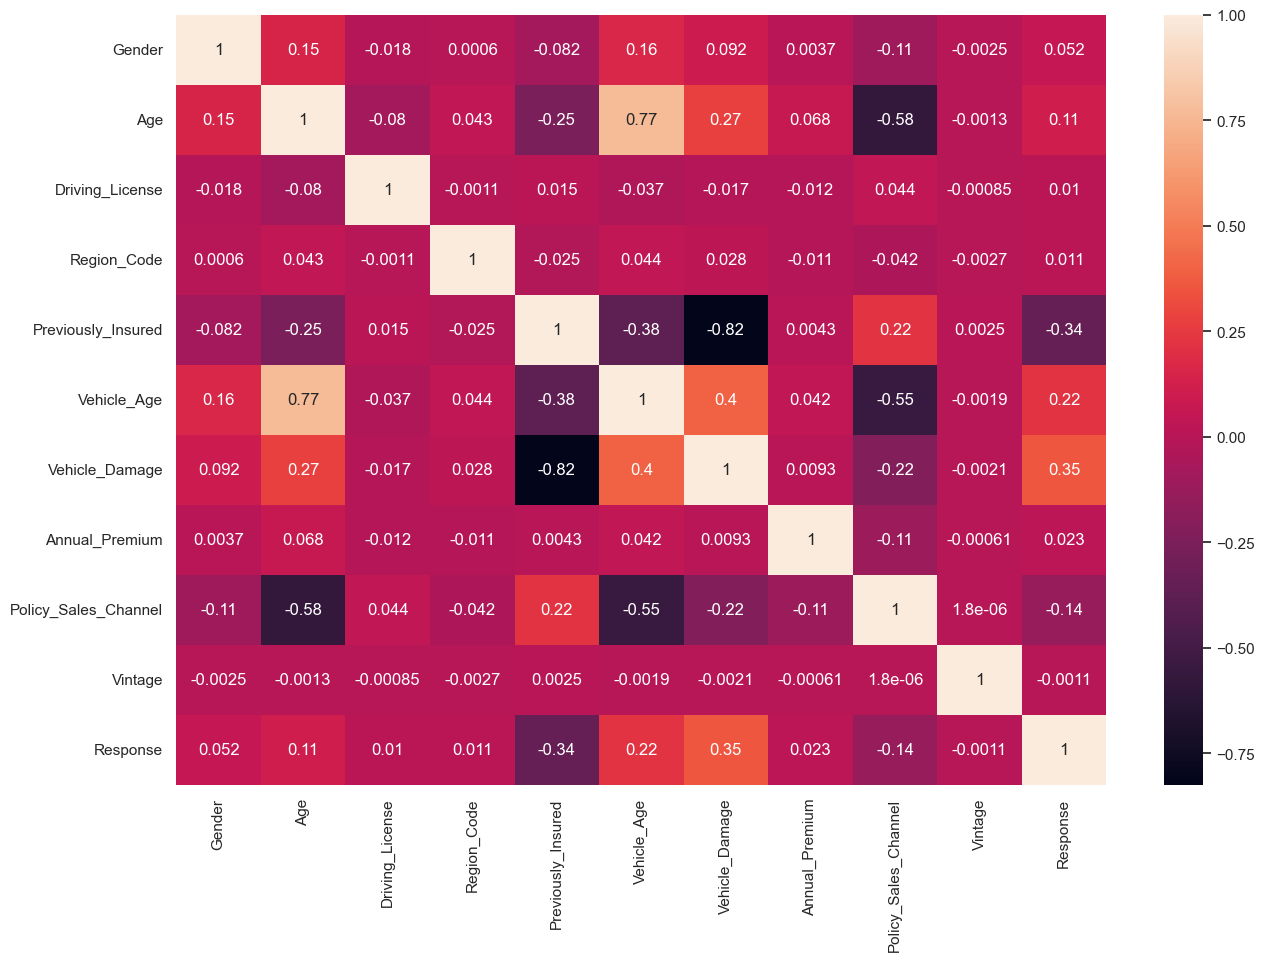

In [25]:
# calculate the correlation matrix
corr = df_raw_data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

plt.show()

In [26]:
#Identifies the highly correlated features with the "Response"
hig_corr = df_raw_data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Remove Outliers </b></span>

In [27]:
# get the summary
desc_df = df_raw_data.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000
+3_std,2.035771,85.357417,1.136198,66.078471,1.952964,2.311934,2.004807,82203.854752,274.646279,405.361308,1.106371
-3_std,-0.954248,-7.712249,0.859541,-13.300857,-1.036543,-1.092703,-0.995054,-21075.075589,-50.577690,-96.666514,-0.861244


In [28]:
df_raw_data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [29]:
#Calculate the IQR (Interquartile Range):
Q1 = df_raw_data['Annual_Premium'].quantile(0.25)
Q3 = df_raw_data['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bounds to identify outliers:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove the outliers from the dataframe:
df_raw_data = df_raw_data[(df_raw_data['Annual_Premium'] >= lower_bound) & (df_raw_data['Annual_Premium'] <= upper_bound)]

In [30]:
df_raw_data.shape

(370789, 11)

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Removed the significant number of outliers in the "Annual_Premium" column and the resulting dataset is left with 370789 records that are within the acceptable range of values.</i></div>

In [31]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370789 non-null  int64  
 1   Age                   370789 non-null  int64  
 2   Driving_License       370789 non-null  int64  
 3   Region_Code           370789 non-null  float64
 4   Previously_Insured    370789 non-null  int64  
 5   Vehicle_Age           370789 non-null  int64  
 6   Vehicle_Damage        370789 non-null  int64  
 7   Annual_Premium        370789 non-null  float64
 8   Policy_Sales_Channel  370789 non-null  float64
 9   Vintage               370789 non-null  int64  
 10  Response              370789 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 33.9 MB


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>VIF - Variance Inflation Factor</b></span>

In [32]:
# Drop the dependent varibale 
df_raw_data_X = df_raw_data.drop(columns=['Response'])

In [33]:
# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_raw_data_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_raw_data_X.values, i) for i in range(df_raw_data_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
2,Driving_License,43.90
1,Age,18.54
8,Policy_Sales_Channel,8.17
6,Vehicle_Damage,6.32
5,Vehicle_Age,6.01
4,Previously_Insured,5.73
7,Annual_Premium,4.96
3,Region_Code,4.92
9,Vintage,4.37
0,Gender,2.24


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Prepared Dataset</b></span>

Reference - https://www.geeksforgeeks.org/working-csv-files-python/

In [34]:
# Extract the clean data in CSV format 
df_raw_data.to_csv('CrossSell_Clean_Data.csv', index = False, encoding = 'utf-8')

<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7ab8c7;overflow:hidden">Machine Learning model</div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Define dependent(y) and independent(X) variables</b></span>

In [35]:
# Define the dependent variable (y) and independent variables (X)
y = df_raw_data['Response']
X = df_raw_data.drop(columns=['Response'])      

print(y.head())
print('*'*100)
print(X.head())

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64
****************************************************************************************************
   Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   
1       1   76                1          3.0                   0            1   
2       1   47                1         28.0                   0            2   
3       1   21                1         11.0                   1            0   
4       0   29                1         41.0                   1            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183  
2               1         38294.0                  26.0       27  
3               0         28619.0                 152.0      203  
4            

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Logistic</b> Regression

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Initial Model</b></span>

In [36]:
# Add a constant term to the independent variables
X_cons = sm.add_constant(X)
X_cons.head()

,const,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1.0,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,1.0,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1.0,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,1.0,0,29,1,41.0,1,0,0,27496.0,152.0,39


In [37]:
logit_model = sm.Logit(y, X_cons)

# Fit the model
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.275499
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               370789
Model:                          Logit   Df Residuals:                   370778
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.2563
Time:                        21:47:58   Log-Likelihood:            -1.0215e+05
converged:                       True   LL-Null:                   -1.3736e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9042      0.173    -22.581      0.000      -4.243      -3.56

In [38]:
# Get the coefficients and p-values
coefficients = result.params
p_values = result.pvalues

print("\033[1mCoefficients:\033[0m")
print(coefficients)
print("\n\033[1mP-values:\033[0m")
print(p_values)

Coefficients:
const                  -3.904209
Gender                  0.101141
Age                    -0.019790
Driving_License         1.219860
Region_Code            -0.000619
Previously_Insured     -4.007978
Vehicle_Age             0.692282
Vehicle_Damage          2.016562
Annual_Premium          0.000002
Policy_Sales_Channel   -0.002821
Vintage                -0.000028
dtype: float64

P-values:
const                   6.633822e-113
Gender                   2.878527e-19
Age                     2.176383e-298
Driving_License          1.962903e-13
Region_Code              1.562561e-01
Previously_Insured       0.000000e+00
Vehicle_Age              0.000000e+00
Vehicle_Damage           0.000000e+00
Annual_Premium           4.937742e-07
Policy_Sales_Channel    1.719485e-142
Vintage                  6.717717e-01
dtype: float64


<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> Based on the model summary, the variables 'Region_Code' and 'Vintage' have coefficients close to zero and p-values greater than 0.05 which suggests that these variables may not have a significant impact on the target variable ('Response') so running the model again after dropping these 2 variables.</i></div>

In [39]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,0,29,1,41.0,1,0,0,27496.0,152.0,39


In [40]:
X.drop(columns=['Region_Code', 'Vintage'],inplace=True)

In [41]:
X.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,1,44,1,0,2,1,40454.0,26.0
1,1,76,1,0,1,0,33536.0,26.0
2,1,47,1,0,2,1,38294.0,26.0
3,1,21,1,1,0,0,28619.0,152.0
4,0,29,1,1,0,0,27496.0,152.0


<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Reduced Model</b></span>

In [42]:
# Add a constant term to the independent variables
X_cons = sm.add_constant(X)
X_cons.head()

,const,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,1.0,1,44,1,0,2,1,40454.0,26.0
1,1.0,1,76,1,0,1,0,33536.0,26.0
2,1.0,1,47,1,0,2,1,38294.0,26.0
3,1.0,1,21,1,1,0,0,28619.0,152.0
4,1.0,0,29,1,1,0,0,27496.0,152.0


In [43]:
logit_model = sm.Logit(y, X_cons)

# Fit the model
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.275502
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               370789
Model:                          Logit   Df Residuals:                   370780
Method:                           MLE   Df Model:                            8
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.2563
Time:                        21:48:01   Log-Likelihood:            -1.0215e+05
converged:                       True   LL-Null:                   -1.3736e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9243      0.172    -22.784      0.000      -4.262      -3.58

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Train/Test Split</b></span>

In [44]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [45]:
X_train.shape, y_train.shape

((296631, 8), (296631,))

In [46]:
X_test.shape, y_test.shape

((74158, 8), (74158,))

In [47]:
# Extract the training and testing data in CSV format 
X_train.to_csv('X_train.csv', index = False, encoding = 'utf-8')
X_test.to_csv('X_test.csv', index = False, encoding = 'utf-8')
y_train.to_csv('y_train.csv', index = False, encoding = 'utf-8')
y_test.to_csv('y_test.csv', index = False, encoding = 'utf-8')

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Performing logistic regression using scikit-learn</b></span>

In [48]:
# Create an instance of the logistic regression model
logreg_model=LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
# Make predictions on the training set
y_train_pred = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [50]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
print(y_pred_logreg)
test_accuracy = accuracy_score(y_test, y_pred_logreg)

[0 0 0 ... 0 0 0]


<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Model Evaluation</b></span>

In [51]:
# Print the Training and Testing accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8735870492295141
Testing Accuracy: 0.8737695191348203


<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> The model correctly predicts the response for approximately 87% of the observations in both the training and testing datasets which is greater than the threshold of 80% stated in the alternate hypothesis.</i></div>

In [52]:
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))

Precision: 0.3686244204018547
Recall: 0.05287662121715996
F1-Score: 0.0924866698982065


<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> The low values for precision, recall, and F1-score indicate that the model's performance in correctly identifying interested customers (positive class) is relatively low.</i></div>

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Confusion Matrix</b></span>

Confusion matrix

 [[64320   817]
 [ 8544   477]]

True Positives(TP) =  64320

True Negatives(TN) =  477

False Positives(FP) =  817

False Negatives(FN) =  8544


<AxesSubplot:>

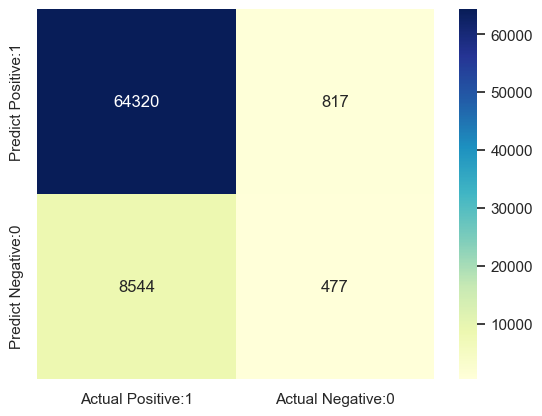

In [53]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_logreg)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>ROC-AUC</b></span>

In [54]:
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_logreg)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.5201669133996203


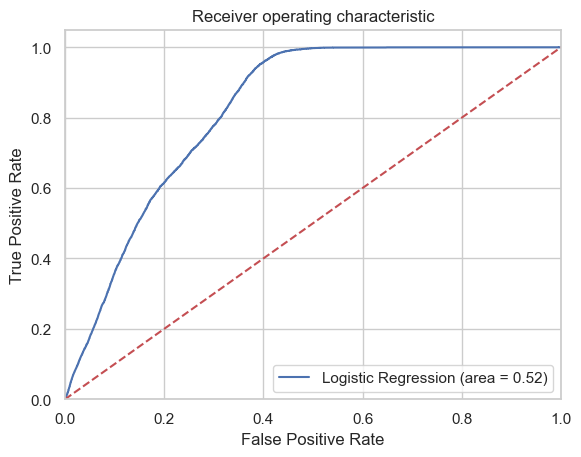

In [55]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<div style="background-color:white;font-size:18px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i> ROC-AUC score of 0.5 suggests that the model's predictions are no better than random.</i></div>

## Additional Study to improve model performace


This is just additional study to check if resampling improve the model performance. 

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"> Logistic Regression using <b>Resampling</b>

In [56]:
#Import the ROS library 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [57]:
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 651268
Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


### Explanation : 
The code is performing oversampling using the RandomOverSampler algorithm to address class imbalance in the data. It creates synthetic samples from the minority class to increase its representation in the dataset, thereby balancing the classes. The resulting resampled data is stored in X_new and y_new variables.

In [58]:
#Train test splitting
X_train, X_test ,y_train, y_test =  train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [59]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((521014, 8), (130254, 8), (521014,), (130254,))

In [60]:
logreg_model_ros=LogisticRegression(max_iter=1000)
logreg_model_ros.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# Make predictions on the training set
y_train_pred_ros = logreg_model_ros.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_ros)

In [62]:
# Make predictions on the validation set
y_pred_logreg_ros = logreg_model_ros.predict(X_test)
print(y_pred_logreg_ros)
test_accuracy = accuracy_score(y_test, y_pred_logreg_ros)

[0 0 0 ... 1 0 1]


In [63]:
# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7809137566360981
Testing Accuracy: 0.7800835291046724


In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_ros))
print("Precision:", precision_score(y_test, y_pred_logreg_ros))
print("Recall:", recall_score(y_test, y_pred_logreg_ros))
print("F1-Score:", f1_score(y_test, y_pred_logreg_ros))

Accuracy: 0.7800835291046724
Precision: 0.7090301771140624
Recall: 0.9493437432760582
F1-Score: 0.81177514209679


<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Confusion Matrix</b></span>

Confusion matrix

 [[39839 25349]
 [ 3296 61770]]

True Positives(TP) =  39839

True Negatives(TN) =  61770

False Positives(FP) =  25349

False Negatives(FN) =  3296


<AxesSubplot:>

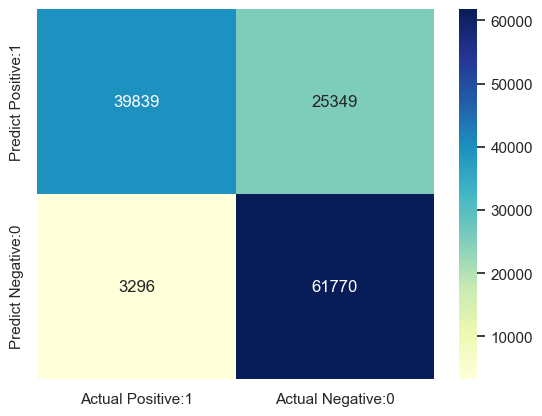

In [65]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_logreg_ros)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>ROC-AUC Curve</b></span>

In [66]:
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_logreg_ros)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.7802419152043297


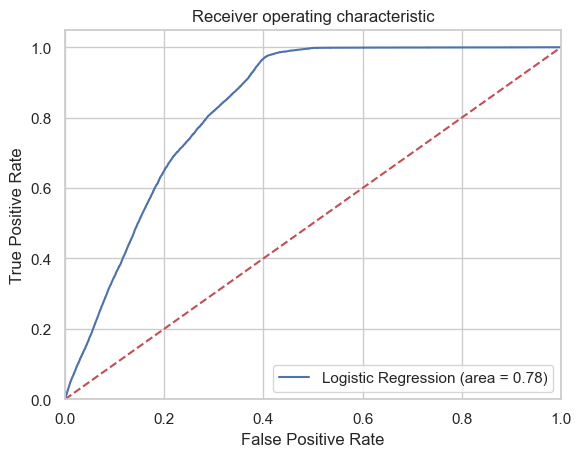

In [67]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg_model_ros.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model_ros.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion

- The model's accuracy, precision, recall, and F1-score have improved, indicating a better prediction of policyholders' interest in vehicle insurance

- There is still room for improvement, especially in reducing the number of false positives and false negatives. Further analysis and optimization techniques may be required to achieve a higher model accuracy and address the limitations observed in the data analysis.


**References**

Avcontentteam. (2016, July 14). Going Deeper into Regression Analysis with Assumptions, Plots & Solutions. 
https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

Li, S. (2017, Sep 28). Building A Logistic Regression in Python, Step by Step.  
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Srivastava, T. (2019, August 6). 12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know.  
https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/